# Imports datasets

In [24]:
import pandas as pd
import seaborn as sns

In [3]:
url_diabetes = 'https://gist.githubusercontent.com/davidneves11/944edb5ecb7bf6d1770eae91cb20d049/raw/50d3d054185815b0c49561f94badedc06ef3c313/diabetes.csv'
diabetes = pd.read_csv(url_diabetes)

In [5]:
url_batimentos = 'https://gist.githubusercontent.com/davidneves11/d72e7f49ab01c856acc5d07be4b1a9dd/raw/37631e3a40da92e6261c00fffdf0fb9b869b35dd/batimentos%2520cardiacos.csv'
batimentos = pd.read_csv(url_batimentos)

In [6]:
url_colesterol = 'https://gist.githubusercontent.com/davidneves11/01b2963f7a8dfd87d79010fbf847b221/raw/685870f4365bcda4e5bb9e342285e0aac37dd556/colesterol.csv'
colesterol = pd.read_csv(url_colesterol)

# Classificação

In [8]:
diabetes[:3]

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,testado_positivo
1,1,85,66,29,0,26.6,0.351,31,testado_negativo
2,8,183,64,0,0,23.3,0.672,32,testado_positivo


In [9]:
x = diabetes.drop('resultado', axis = 1)
y = diabetes[['resultado']]

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y)

dtc = DecisionTreeClassifier(max_depth = 3)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [11]:
dtc.score(x_test, y_test)

0.6822916666666666

In [14]:
from sklearn.dummy import DummyClassifier
dtc_dummy = DummyClassifier(strategy='most_frequent')
dtc_dummy.fit(x_train,y_train)
dtc_dummy.score(x_test, y_test)

0.6197916666666666

<function matplotlib.pyplot.show(*args, **kw)>

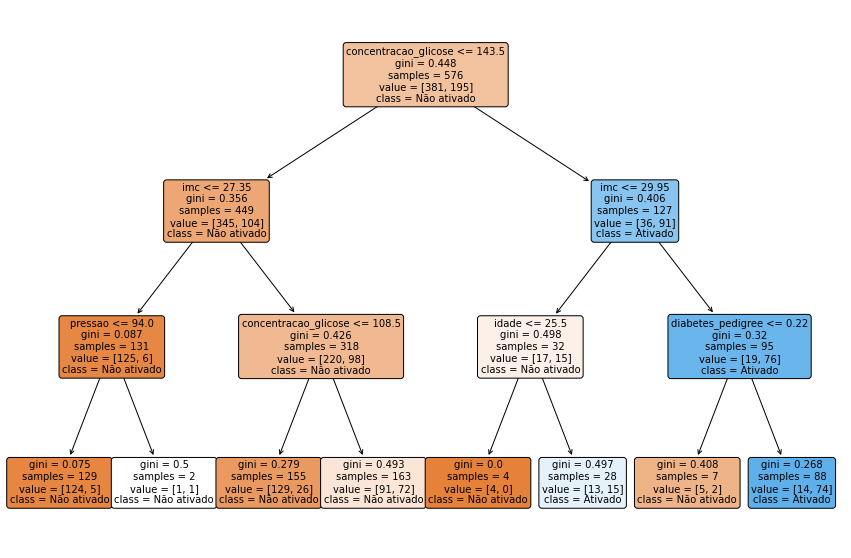

In [21]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (15,10))

tree.plot_tree(dtc,
               ax = ax,
               fontsize = 10,
               rounded = True,
               filled = True,
               feature_names=x_train.columns,
               class_names = ['Não ativado','Ativado'])
plt.show

# Regressão

In [23]:
batimentos[:3]

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44.247295,53.591343,3.397836,82.307425
1,81.427930,172.569375,33.142344,179.045377
2,50.807130,74.582817,8.645704,103.522796


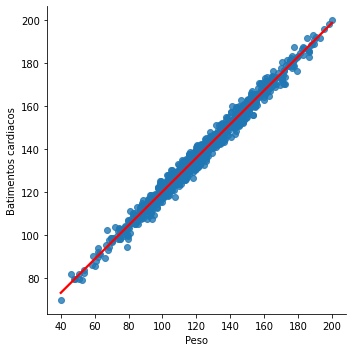

In [26]:
sns.lmplot(x = 'Peso', y = 'Batimentos cardiacos', data = batimentos,
           line_kws = {'color':'red'})

In [27]:
x = batimentos[['Peso', 'Idade']]
y = batimentos['Batimentos cardiacos']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x,y)

lr = LinearRegression(fit_intercept = False, normalize = True) # Tá desatualizado
lr.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(fit_intercept=False, normalize=True)

In [30]:
lr.score(x_test, y_test)

0.9855125222848855

# Clustering

In [32]:
colesterol[:3]

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229


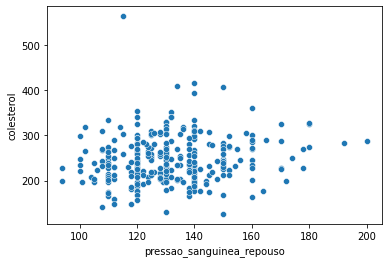

In [33]:
sns.scatterplot(x = 'pressao_sanguinea_repouso', y = 'colesterol' , data = colesterol)

In [36]:
x = colesterol # Vai dar problema por ter feature float

In [37]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2)
kmeans.fit(x) # Problema por ter variável float

In [40]:
x = colesterol.select_dtypes('int64')

In [41]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [42]:
kmeans.labels_

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
colesterol['Cluster_kmeans'] = kmeans.labels_

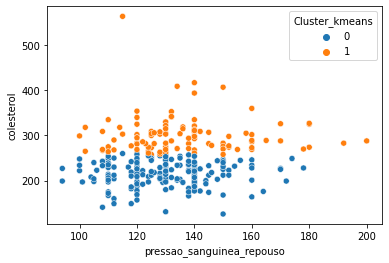

In [46]:
sns.scatterplot(x = 'pressao_sanguinea_repouso', y = 'colesterol' , hue = 'Cluster_kmeans',data = colesterol)